In [1]:
# import numpy as np
# import pandas as pd

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [3]:
df = pd.read_csv('data.csv')
print(df.shape)
df.head()

(801, 20532)


,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [4]:
y = pd.read_csv('labels.csv')
print(y.shape)
y.head()

(801, 2)


,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [5]:
y['Class'].value_counts()

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: Class, dtype: int64

# Refining the sample data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20532 entries, Unnamed: 0 to gene_20530
dtypes: float64(20531), object(1)
memory usage: 125.5+ MB


In [7]:
df.isnull().sum()

Unnamed: 0    0
gene_0        0
gene_1        0
gene_2        0
gene_3        0
             ..
gene_20526    0
gene_20527    0
gene_20528    0
gene_20529    0
gene_20530    0
Length: 20532, dtype: int64

In [8]:
# df.describe()

# View the labels in the variable

In [9]:
y = y['Class']
print(y)

0      PRAD
1      LUAD
2      PRAD
3      PRAD
4      BRCA
       ... 
796    BRCA
797    LUAD
798    COAD
799    PRAD
800    PRAD
Name: Class, Length: 801, dtype: object


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(y)

# y = le.transform(y)

In [11]:
print(y)

[4 3 4 4 0 4 2 4 0 4 0 2 4 0 0 0 3 2 2 4 0 2 3 0 2 3 1 0 0 0 0 0 2 0 4 0 2
 3 0 0 2 4 4 2 2 0 4 1 0 3 0 3 0 4 1 0 0 1 2 0 3 2 0 3 4 1 0 4 2 0 2 0 0 3
 0 3 0 2 4 1 0 4 0 0 4 4 0 0 2 0 4 4 0 0 0 4 1 0 4 0 0 2 0 2 3 2 3 1 3 3 4
 0 3 4 0 2 2 2 0 0 3 2 3 0 4 4 4 0 2 3 1 0 1 0 0 2 3 0 2 1 0 4 0 2 3 1 4 0
 3 3 3 3 0 0 3 0 0 4 4 3 4 3 2 0 4 3 1 2 3 0 2 3 0 3 0 0 0 4 0 2 1 2 0 4 4
 4 3 3 0 3 3 2 3 4 3 0 0 0 3 3 0 2 2 2 2 4 0 4 0 3 3 0 4 0 4 0 0 0 3 0 2 3
 2 2 3 0 2 4 0 3 3 4 1 0 2 4 2 1 0 2 2 3 4 4 3 3 2 0 0 1 0 4 1 0 4 2 4 4 4
 0 1 1 3 1 1 4 3 0 0 2 2 0 1 4 2 4 0 0 2 0 0 0 0 3 3 0 0 0 2 2 2 2 0 0 0 2
 0 0 3 4 0 0 1 3 4 0 0 0 1 0 4 0 1 3 3 4 2 0 2 2 3 1 2 0 0 0 0 2 0 0 4 0 2
 0 3 4 2 0 4 1 0 0 0 3 3 3 0 0 4 3 0 2 0 1 1 3 0 2 0 0 0 1 3 1 2 4 2 0 0 2
 0 1 4 3 4 0 2 4 0 1 2 2 1 1 4 0 0 1 2 0 4 0 0 0 3 3 2 3 0 2 1 4 0 3 4 0 0
 0 3 0 0 4 0 4 1 0 3 0 0 3 0 0 0 2 3 4 0 4 2 0 2 1 0 4 3 2 0 0 2 0 3 0 0 4
 1 0 2 3 4 0 4 0 0 0 0 2 3 0 2 0 0 3 3 2 1 4 1 0 2 2 0 4 2 1 3 3 0 4 4 0 4
 3 2 4 0 3 4 3 0 0 1 3 2 

In [12]:
print(y.shape)

(801,)


In [13]:
df.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [14]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [15]:
df.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [16]:
# cols = df.columns

In [17]:
# df = pd.DataFrame(df, columns=[cols])

In [18]:
# df.head()

In [19]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
# #Load Data
# # data = df
# pca = PCA(2)
 
# #Transform the data
# df = pca.fit_transform(df)

In [20]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

df = ms.fit_transform(df)

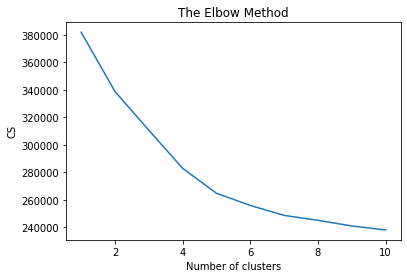

In [21]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [22]:
data = df

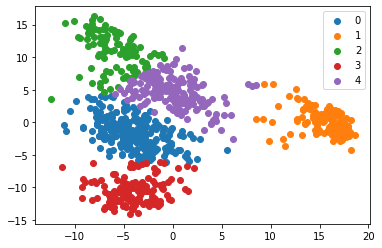

In [23]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
data = df
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
 
#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 5)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [24]:
kmeans.cluster_centers_

array([[ -3.99471449,  -1.62053672],
       [ 15.55974522,   0.0541356 ],
       [ -5.97936135,  10.86762887],
       [ -4.09415781, -10.45686952],
       [  0.06599595,   4.69554218]])

In [25]:
kmeans.inertia_

8955.414547369084

In [26]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 240 out of 801 samples were correctly labeled.


In [27]:
print('Clusture score: {0:0.2f}'. format(correct_labels/float(y.size)))

Clusture score: 0.30


In [28]:
from sklearn import metrics
metrics.silhouette_score(df,labels)

0.5118775529956934

In [29]:
metrics.calinski_harabasz_score(df,labels)

1676.6371140462973

In [30]:
metrics.adjusted_rand_score(y,labels)

0.722276752060253

In [31]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(df, labels)

0.6737045537543553

In [32]:
from sklearn.metrics.cluster import fowlkes_mallows_score
fowlkes_mallows_score(y, labels)

0.7870210972673004

In [33]:
from sklearn.metrics import rand_score
metrics.rand_score(y, labels)

0.9015699126092385

In [34]:
from sklearn.metrics.cluster import adjusted_mutual_info_score
adjusted_mutual_info_score (y, labels)

0.7359710881231329

In [35]:
metrics.homogeneity_score(y, labels)

0.7504392517351101

In [36]:
metrics.completeness_score(y, labels)

0.7253929441188042

In [37]:
from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(y, labels)

0.737703567828016

In [38]:
from sklearn.metrics.cluster import adjusted_mutual_info_score
adjusted_mutual_info_score(y, labels)

0.7359710881231329